# Test 1

Here, we describe a relatively difficult aspect of the Navier-Stoke's equation: advection. We perform a simple experiment - There is a 1D domain with a sine curve to be advected. We first consider u as a tracer and advect it with a constant velocity a, and then use the full non-linear convective term. The boundaries have Neumann boundary condition ($\frac{\partial u}{\partial x} =  0$).The equation we use are laid down below:

$$\frac{\partial (u_m h_m)}{\partial t} + a \frac{\partial (u_m h_m)}{\partial x} = 0,$$
$$\frac{\partial (u_m h_m)}{\partial t} + \frac{\partial (u_m u_m h_m)}{\partial x} = 0.$$

The results for constant advective speed are: We get stable advection, but only for a certain combination of advective speed and finite difference schemes. If a is positive(negative), we need backward(forward) difference.

The results for non-linear equation are: We get unstable convection for forward, backward and central differences, and for all values of spatial and temporal resolutions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [ ]:
Lx = 100
nx = 50
dx = Lx/nx
g = 9.81
rho0 = 1025

xu_ocean = np.linspace(0,Lx,nx,dtype = float)

In [ ]:
def partial_x(f,dx):
    dfdx = 1/(dx) * (f[1:nx-1] - f[0:nx-2])  #Backward differerence, stable for positive advection velocity
    #dfdx = 1/(2*dx) *(f[2:nx] - f[0:nx-2])
    return dfdx

def adv_x_Euler(f1,hm_old,hm_new):
    a = 0.5 #Speed of advection
    #f3 = -(1/hm_new[1:nx-1])*partial_x(hm_old*f1**2,dx)
    f3 = -(1/hm_new[1:nx-1])*a*partial_x(hm_old*f1,dx)
    return f3

In [ ]:
MLD_0 = -150*np.ones(nx)

um_old = np.sin(np.pi*xu_ocean/(2*Lx) + np.pi/4) - 0.5
um_new = np.zeros(nx)
hm_old = -MLD_0
hm_new = hm_old

t_start = 0
t_end = 36
dt = 2
for t in np.arange(t_start,t_end,dt):
    um_new[1:nx-1] = um_old[1:nx-1] + dt*adv_x_Euler(um_old,hm_old,hm_new)
    
    um_new[0] = um_new[1]
    um_new[-1] = um_new[-2]
    um_old = um_new

# Test 2

The previous experiment showed that we cannot use the central difference scheme for advection at all. This makes our scheme, at best, a first-order scheme. Can we do something to increase our accuracy by having the second-order sheme like before, and introduce a damping term to cancel the numerical oscillations introduced by the second-order scheme? It turns out that the answer for this question is a resounding YES! We introduce a second order dissipative term and modify our governing equation in the following manner:

$$\frac{\partial (u_m h_m)}{\partial t} + a \frac{\partial (u_m h_m)}{\partial x} = \nu \nabla^2 (u_m h_m),$$

where $\nu$ is the kinematic viscosity of the fluid. For this test, we have a constant advective velocity a, and $u_m$ is assumed to be a tracer in the domain. We find that for a specific $dt$ and $dx$, there is a unique $\nu$ that completely nullifies the unstable oscillations introduced by the central-order difference scheme.

In [46]:
Lx = 100
nx = 50
dx = Lx/nx
g = 9.81
rho0 = 1025

xu_ocean = np.linspace(0,Lx,nx,dtype = float)

In [47]:
def partial_x(f,dx):
    #dfdx = 1/(dx) * (f[1:nx-1] - f[0:nx-2])  #Backward differerence, stable for positive advection velocity
    dfdx = 1/(2*dx) *(f[2:nx] - f[0:nx-2])
    return dfdx

def adv_x_Euler(f1,hm_old,hm_new):
    a = 0.25 #Speed of advection
    #f3 = -(1/hm_new[1:nx-1])*partial_x(hm_old*f1**2,dx)
    f3 = -(1/hm_new[1:nx-1])*a*partial_x(hm_old*f1,dx)
    return f3

def diff_Euler(um_old,dx):
    f3 = (um_old[2:nx] - 2*um_old[1:nx-1] + um_old[0:nx-2])/(dx**2)
    return f3

In [48]:
MLD_0 = -150*np.ones(nx)
nu_x = 0.125

um_old = np.sin(np.pi*xu_ocean/(2*Lx) + np.pi/4) - 0.5
um_new = np.zeros(nx)
hm_old = -MLD_0
hm_new = hm_old

t_start = 0
t_end = 40
dt = 1
for t in np.arange(t_start,t_end,dt):
    um_new[1:nx-1] = um_old[1:nx-1] + dt*adv_x_Euler(um_old,hm_old,hm_new) + dt*nu_x*diff_Euler(um_old,dx)
    
    um_new[0] = um_new[1]
    um_new[-1] = um_new[-2]
    um_old = um_new

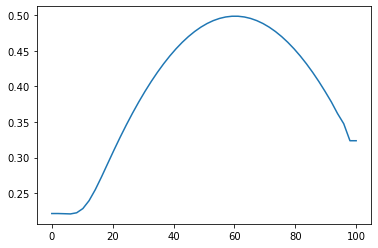

In [49]:
plt.plot(xu_ocean,um_new)

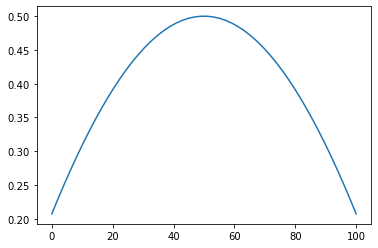

In [15]:
plt.plot(xu_ocean,np.sin(np.pi*xu_ocean/(2*Lx) + np.pi/4) - 0.5)

# Test 3

The last test of this notebook solves for an advection equation with non-linear terms, i.e., a variable advection speed. The equation is given by:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$. 

We try something which we know is supposed to fail - the forward in time, central in space finite difference scheme. But, we deliberately add a dissipation term to this equation:
$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2},$$
which does two things: (a) It dissipates the unnecessary oscillations induced by the central differene scheme, and (ii) It diffuses velocity, and hence, energy in the domain.

The results are quite positive: We get non-linear advection along with some artificial oscillations initially, which is balanced by the dissipation term, and towards the end, the effects of diffusion can be seen clearly with a constant velocity over the domain.

In [98]:
Lx = 100
nx = 50
dx = Lx/nx
g = 9.81
rho0 = 1025

xu_ocean = np.linspace(0,Lx,nx,dtype = float)

In [99]:
def partial_x(f,dx):
    #dfdx = 1/(dx) * (f[1:nx-1] - f[0:nx-2])  #Backward differerence, stable for positive advection velocity
    dfdx = 1/(2*dx) *(f[2:nx] - f[0:nx-2])
    return dfdx

def adv_x_Euler(f1,hm_old,hm_new):
    a = 0.25 #Speed of advection
    f3 = -(1/hm_new[1:nx-1])*partial_x(hm_old*f1**2,dx)
    #f3 = -(1/hm_new[1:nx-1])*a*partial_x(hm_old*f1,dx)
    return f3

def diff_Euler(um_old,dx):
    f3 = (um_old[2:nx] - 2*um_old[1:nx-1] + um_old[0:nx-2])/(dx**2)
    return f3

In [252]:
MLD_0 = -150*np.ones(nx)
nu_x = 4*np.ones(nx-2)

um_old = np.sin(np.pi*xu_ocean/(0.5*Lx) + np.pi/4) + 1.2
um_new = np.zeros(nx)
hm_old = -MLD_0
hm_new = hm_old

t_start = 0
t_end = 48
dt = 0.5
for t in np.arange(t_start,t_end,dt):
    um_new[1:nx-1] = um_old[1:nx-1] + dt*adv_x_Euler(um_old,hm_old,hm_new) + dt*nu_x*diff_Euler(um_old,dx)
    
    um_new[0] = um_new[1]
    um_new[-1] = um_new[-2]
    um_old = um_new

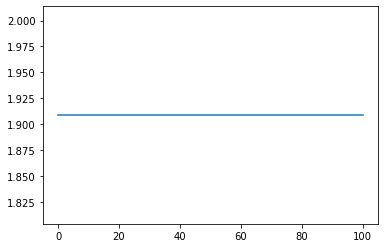

In [253]:
plt.plot(xu_ocean,um_old)

An important question arises from this analysis - If our answer is correct, we should expect constant velocity in the ocean as well, but we clearly don't. Why?

The answer to this question is simple: The ocean isn't governed by this equation, it has a lot of other terms like the Coriolis, wind stress and pressure terms, which all lead to a non-uniformity/non-homogenity of tracers, velocities and other measurable quantities of the ocean. 